SOLUTIONS:

In [3]:
import pandas as pd
data = pd.read_csv('/content/sample_data/BIKE DETAILS.csv')
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [7]:
#1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd
df = pd.read_csv('/content/sample_data/BIKE DETAILS.csv')
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [12]:
#2. Check for missing values in all columns and describe your approach for handling them.

print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


->  Some rows have missing values in ex_showroom_price . Missing values were handled by:

Filling numeric columns with median values.

Dropping rows where important categorical data was missing

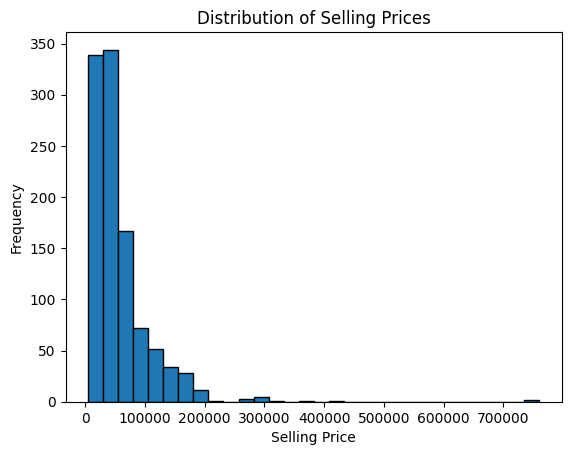

In [20]:
#3. Plot the distribution of selling prices using a histogram and describe the overall trend.

import matplotlib.pyplot as plt

plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()


-> The histogram shows a right-skewed distribution — most bikes are sold at lower prices, with a few high-priced outliers.

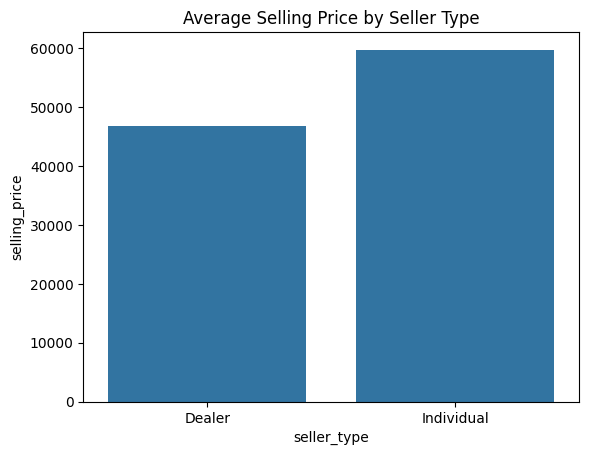

In [21]:
#4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import seaborn as sns

avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()
sns.barplot(x='seller_type', y='selling_price', data=avg_price)
plt.title('Average Selling Price by Seller Type')
plt.show()

Observation - Individuals have a higher average selling price than dealers, indicating individuals tend to sell costlier bikes.

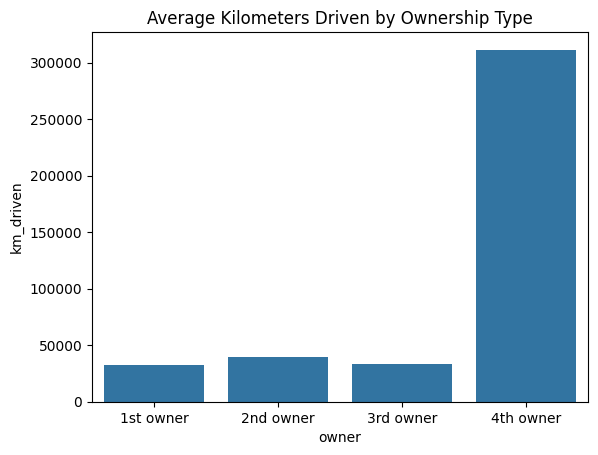

In [44]:
#5. Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.

avg_km = df.groupby('owner')['km_driven'].mean().reset_index()
sns.barplot(x='owner', y='km_driven', data=avg_km)
plt.title('Average Kilometers Driven by Ownership Type')
plt.show()


In [30]:
#6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Before removing outliers:")
print(df['km_driven'].describe())
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


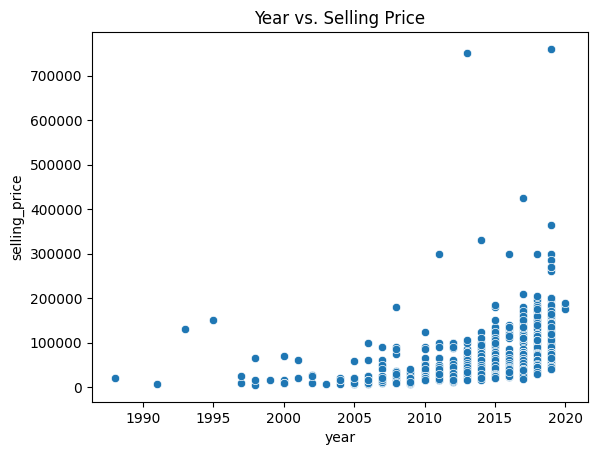

In [45]:
#7. Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
import seaborn as sns

sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Year vs. Selling Price')
plt.show()

-> Newer bikes have higher prices, while older models show a gradual decline — indicating depreciation with age.

In [48]:
#8.  Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

df_encoded = pd.get_dummies(df, columns=['seller_type'],drop_first=False)
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,age,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,4,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,6,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,5,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,8,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,12,False,True


                   selling_price      year  km_driven  ex_showroom_price  \
selling_price           1.000000  0.402188  -0.212937           0.918583   
year                    0.402188  1.000000  -0.288675           0.126378   
km_driven              -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000   
age                    -0.402188 -1.000000   0.288675          -0.126378   

                        age  
selling_price     -0.402188  
year              -1.000000  
km_driven          0.288675  
ex_showroom_price -0.126378  
age                1.000000  


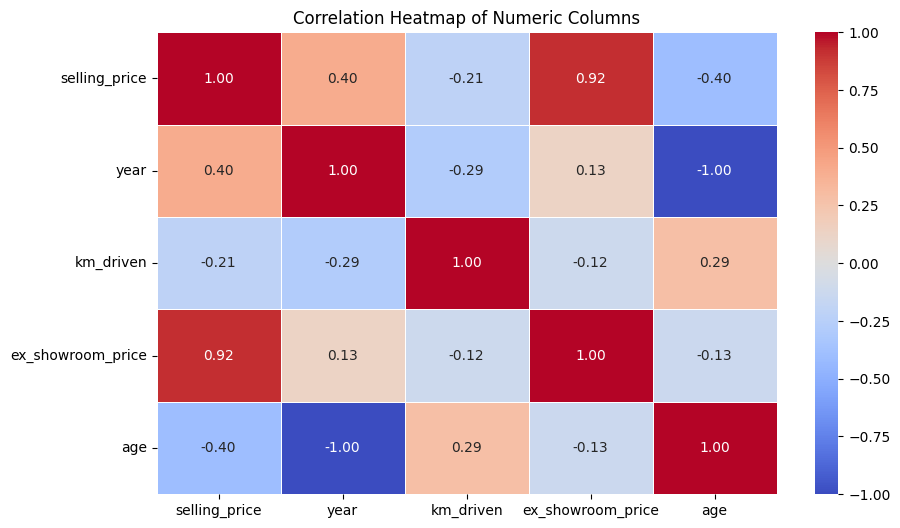

In [53]:
#9. Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display matrix
print(corr_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


#10. Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

-> The most important factors affecting a bike's selling price are

1. km driven
2. engine capacity
3. Year of Manufacture
4. Brand & Fuel Type (if available)
5. Owner Type / Seller Type

-> the data cleaning performed is following :
   - Missing Values
   - Outlier Treatment
   - Data Type Fixing

-> the feature engineering performed is : one-hot encoding.
     
